#  펭귄 몸무게 예측 다중 선형 회귀식 생성 및 모델 성능 평가

데이터 셋 링크: https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

캐글에서 제공 된 펭귄 정보가 담긴 데이터 셋으로 선형 회귀를 이용하여 펭귄들의 몸무게를 예측하는 회귀식을 만들고, 모델의 예측도 평가 진행

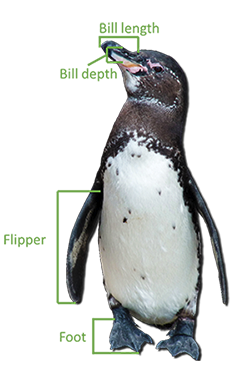

### Data load & preprocessed

In [41]:
# kaggle data set 불러오기
import pandas as pd

df = pd.read_csv('./data/penguins.csv')

In [42]:
# 결측치 확인
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [43]:
# 모든 null 값 데이터 조회
nan_rows = df[df.isna().any(axis=1)]

In [44]:
# 이상치 발견 제거
rows_with_dot = df[df['sex'] == '.']
delete_dot_df = df.drop(df[df['sex'] == '.'].index, inplace=False)

In [45]:
# 인덱스 재정렬
delete_dot_df.reset_index(drop=True, inplace=True)

In [46]:
# 펭귄 신체정보와, 성별이 누락 된 두 열만 삭제
delete_allnone_rows_df = delete_dot_df.drop(delete_dot_df.index[[3,338]], inplace=False)

In [47]:
delete_allnone_rows_df.reset_index(drop=True, inplace=True)

In [48]:
delete_allnone_rows_df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

### EDA_1 펭귄의 종, 성별에 따라 평균적인 부리길이, 발길이,팔길이가 다를 것이다. 클수록 무거울 것이다. 

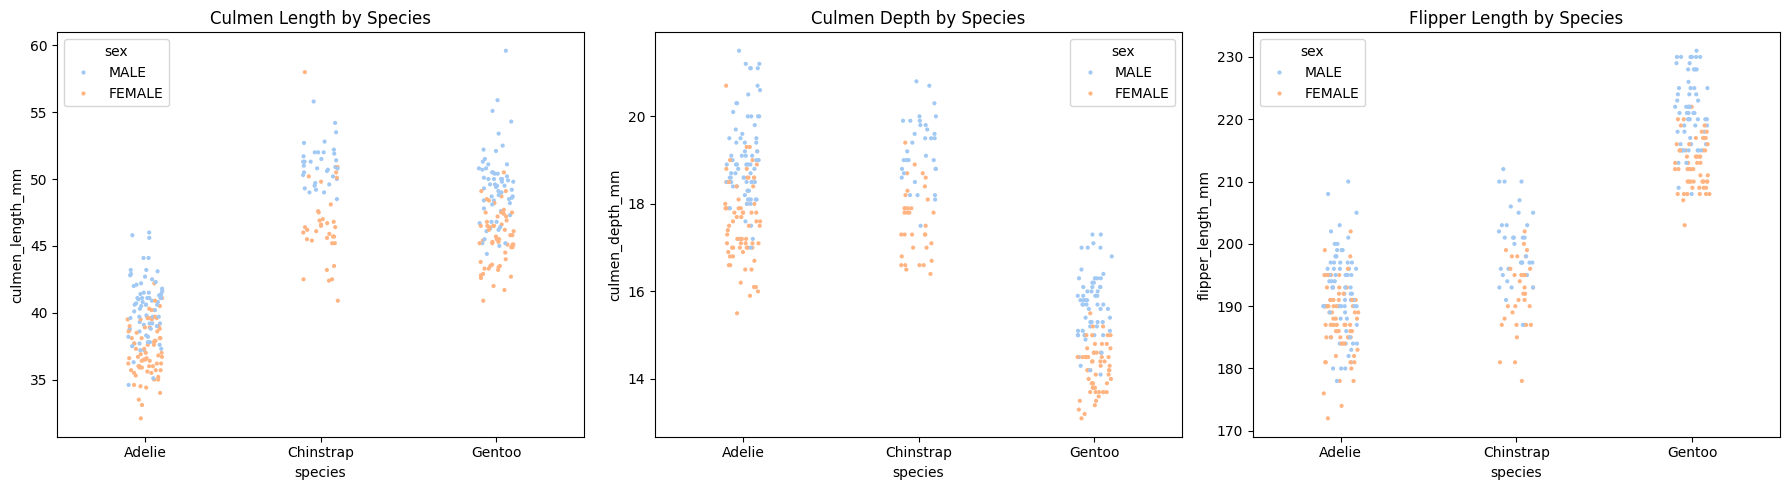

In [49]:
# 종과 성별 별로 크기가 다른가?
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정 (가로 18인치, 세로 5인치)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 첫 번째 stripplot
sns.stripplot(
    x="species",
    y="culmen_length_mm",
    hue='sex',
    data=delete_allnone_rows_df,
    palette="pastel",
    size=3,
    ax=axes[0]  # 첫 번째 subplot에 그리기
)
axes[0].set_title("Culmen Length by Species")

# 두 번째 stripplot
sns.stripplot(
    x="species",
    y="culmen_depth_mm",
    hue='sex',
    data=delete_allnone_rows_df,
    palette="pastel",
    size=3,
    ax=axes[1]  # 두 번째 subplot에 그리기
)
axes[1].set_title("Culmen Depth by Species")

# 세 번째 stripplot
sns.stripplot(
    x="species",
    y="flipper_length_mm",
    hue='sex',
    data=delete_allnone_rows_df,
    palette="pastel",
    size=3,
    ax=axes[2]  # 세 번째 subplot에 그리기
)
axes[2].set_title("Flipper Length by Species")

# 레이아웃 조정
plt.tight_layout()
plt.show()


<Axes: xlabel='species', ylabel='count'>

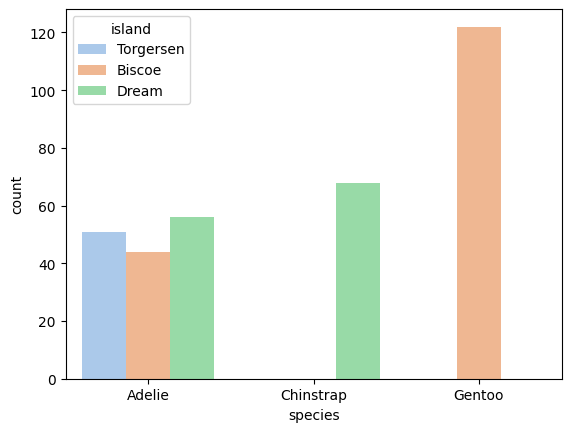

In [50]:
sns.countplot(
    x="species",
    hue = 'island',
    palette="pastel",
    data= delete_allnone_rows_df
)

### EDA_2 아델리 펭귄은 서식지 별로 크기가 다른가?

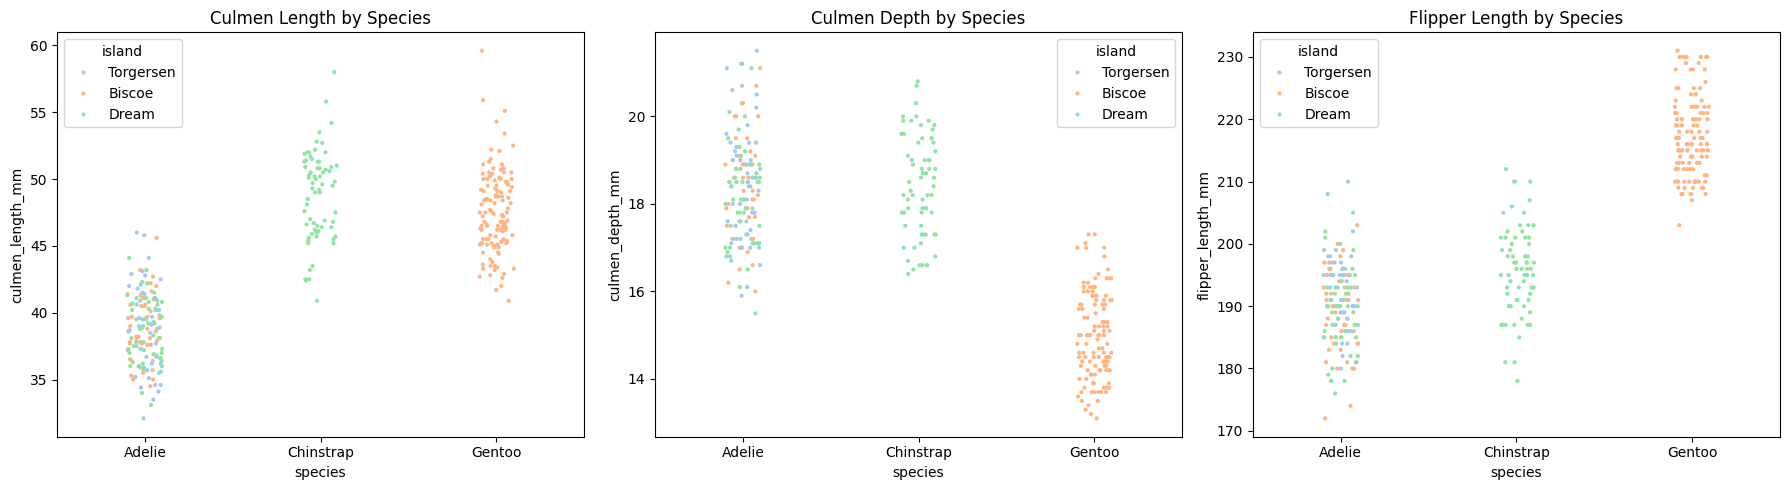

In [51]:
# 아델리 펭귄은 서식지 별로 크기가 다른가?
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정 (가로 18인치, 세로 5인치)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 첫 번째 stripplot
sns.stripplot(
    x="species",
    y="culmen_length_mm",
    hue='island',
    data=delete_allnone_rows_df,
    palette="pastel",
    size=3,
    ax=axes[0]  # 첫 번째 subplot에 그리기
)
axes[0].set_title("Culmen Length by Species")

# 두 번째 stripplot
sns.stripplot(
    x="species",
    y="culmen_depth_mm",
    hue='island',
    data=delete_allnone_rows_df,
    palette="pastel",
    size=3,
    ax=axes[1]  # 두 번째 subplot에 그리기
)
axes[1].set_title("Culmen Depth by Species")

# 세 번째 stripplot
sns.stripplot(
    x="species",
    y="flipper_length_mm",
    hue='island',
    data=delete_allnone_rows_df,
    palette="pastel",
    size=3,
    ax=axes[2]  # 세 번째 subplot에 그리기
)
axes[2].set_title("Flipper Length by Species")

# 레이아웃 조정
plt.tight_layout()
plt.show()


### anova_1 서식지 별로 아델리 펭귄의 몸무게가 같은지, 다른지 ANOVA 검증하기

In [52]:
# 3개 이상의 집단의 평균이 같은지, 다른지 여부

# 귀무 가설: 모든 그룹의 평균이 같다.
# 대립 가설: 적어도 한 그룹의 평균은 다르다.

In [53]:
# anova 검증용 data frame
anova_df = delete_allnone_rows_df

In [54]:
adelie_df_filtered = anova_df[anova_df['species'] == 'Adelie']

In [55]:
adelie_df_filtered = adelie_df_filtered[['species', 'island', 'body_mass_g']]

0 (3709.659090909091, 'Biscoe')
1 (3688.3928571428573, 'Dream')
2 (3706.372549019608, 'Torgersen')


/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_66269/2382970601.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


Text(0.5, 1.0, 'mean per island group and global mean')

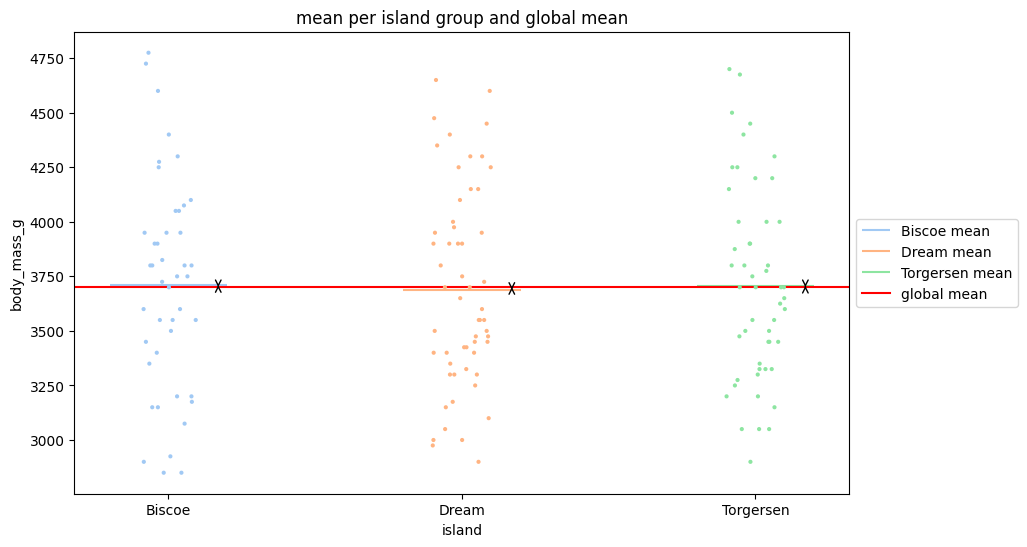

In [56]:
from matplotlib import pyplot as plt
import seaborn as sns

# 전체 아델리 몸무게 평균
global_mean = adelie_df_filtered["body_mass_g"].mean()

# 서식지별 아델리 몸무게 평균
means = adelie_df_filtered.groupby("island")["body_mass_g"].mean()

# 그래프 평균선 순서
island_order = ['Biscoe','Dream','Torgersen']

plt.figure(figsize=(10, 6))
sns.stripplot(
    x="island",
    y="body_mass_g",
    palette = 'pastel',
    data=adelie_df_filtered,
    size=3,
    order = island_order
)

line_width=0.2
line_height=200
pastel_palette = sns.color_palette('pastel', n_colors=len(adelie_df_filtered['island']))
arrow_props = dict(arrowstyle='<->', linewidth=1)

for i, (mean, index) in enumerate(zip(means, means.index)):
    print(i,(mean,index))
    plt.hlines(mean, xmin=(i-line_width), xmax=(i+line_width), label=f"{index} mean", color=pastel_palette[i])
    if global_mean >= mean:
        plt.annotate('', xy=(i+0.17, mean), xytext=(i+0.17, global_mean), arrowprops=arrow_props)
    else:
        plt.annotate('', xy=(i+0.17, global_mean), xytext=(i+0.17, mean), arrowprops=arrow_props)
        
plt.axhline(global_mean, color="r", label="global mean")

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("mean per island group and global mean")

In [57]:
from scipy.stats import f_oneway

groups = []

islands = adelie_df_filtered["island"].unique()
for island in islands:
    groups.append(adelie_df_filtered[adelie_df_filtered["island"]==island]["body_mass_g"])

In [58]:
f_statistic, p_value = f_oneway(*groups) # (*groups)리스트에 있는 값을 1개씩 꺼내오겠다.
print("F-statistic:", f_statistic)
print("p-value:", p_value)
print("귀무 가설 기각 여부:", p_value<0.05)

F-statistic: 0.032048215914071095
p-value: 0.9684666047614272
귀무 가설 기각 여부: False


### anova 1 결론
아델리펭귄은 서식지별 몸무게 차이가 없다.

### anova 2. 서식지 별로 펭귄의 몸무게가 같은지 다른지 ANOVA 검증하기

In [59]:
# 3개 이상의 집단의 평균이 같은지, 다른지 여부

# 귀무 가설: 모든 그룹의 평균이 같다.
# 대립 가설: 적어도 한 그룹의 평균은 다르다.

0 (4715.060240963855, 'Biscoe')
1 (3712.9032258064517, 'Dream')
2 (3706.372549019608, 'Torgersen')


/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_66269/3960468211.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


Text(0.5, 1.0, 'mean per group and global mean')

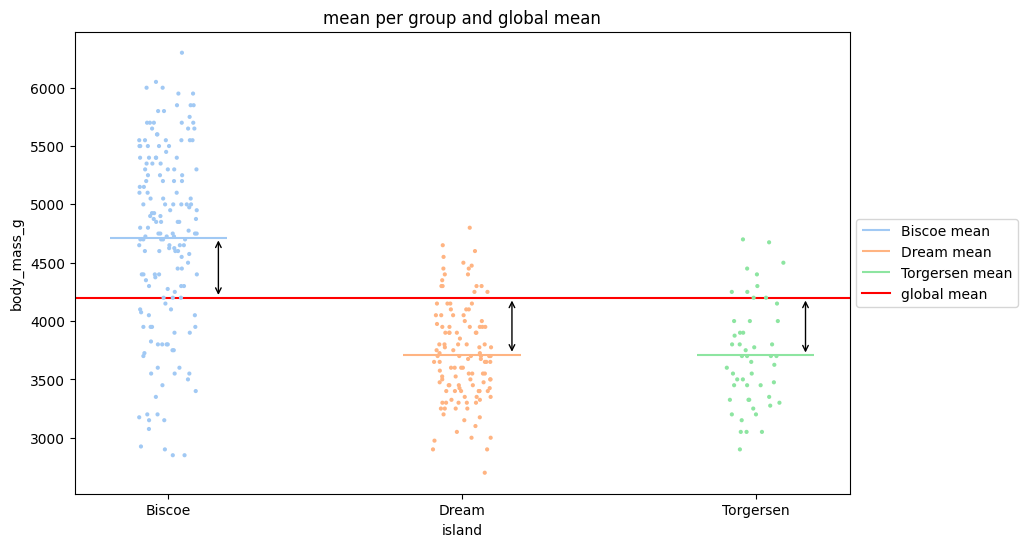

In [60]:
from matplotlib import pyplot as plt
import seaborn as sns

global_mean = anova_df["body_mass_g"].mean()
means = anova_df.groupby("island")["body_mass_g"].mean()

island_order = ['Biscoe','Dream','Torgersen']

plt.figure(figsize=(10, 6))
sns.stripplot(
    x="island",
    y="body_mass_g",
    palette = 'pastel',
    data=anova_df,
    size=3,
    order = island_order
)

line_width=0.2
line_height=200
pastel_palette = sns.color_palette('pastel', n_colors=len(anova_df['island']))
arrow_props = dict(arrowstyle='<->', linewidth=1)

for i, (mean, index) in enumerate(zip(means, means.index)):
    print(i,(mean,index))
    plt.hlines(mean, xmin=(i-line_width), xmax=(i+line_width), label=f"{index} mean", color=pastel_palette[i])
    if global_mean >= mean:
        plt.annotate('', xy=(i+0.17, mean), xytext=(i+0.17, global_mean), arrowprops=arrow_props)
    else:
        plt.annotate('', xy=(i+0.17, global_mean), xytext=(i+0.17, mean), arrowprops=arrow_props)
        
plt.axhline(global_mean, color="r", label="global mean")

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("mean per group and global mean")

In [61]:
global_mean

4199.780058651027

In [62]:
from scipy.stats import f_oneway

groups = []

islands = anova_df["island"].unique()
for island in islands:
    groups.append(anova_df[anova_df["island"]==island]["body_mass_g"])

In [63]:
f_statistic, p_value = f_oneway(*groups) # (*groups)리스트에 있는 값을 1개씩 꺼내오겠다.
print("F-statistic:", f_statistic)
print("p-value:", p_value)
print("귀무 가설 기각 여부:", p_value<0.05)

F-statistic: 109.15897515043319
p-value: 2.6749949818083203e-37
귀무 가설 기각 여부: True


### anova 2 결론 
p-value가 유의 수준보다 낮으므로 그룹 간 평균이 같다는 귀무가설 기각. 전체 평균과 유의미하게 다른 그룹이있음 

### tukey 활용하여 유의미한 그룹찾기 - 젠투 펭귄

In [37]:
from scipy.stats import tukey_hsd

result = tukey_hsd(*groups)
result.pvalue

array([[1.00000000e+00, 2.54241073e-14, 9.97842375e-01],
       [2.54241073e-14, 1.00000000e+00, 2.54241073e-14],
       [9.97842375e-01, 2.54241073e-14, 1.00000000e+00]])

In [38]:
pvalue_table = pd.DataFrame(result.pvalue, columns=islands, index=islands)
pvalue_table

,Torgersen,Biscoe,Dream
Torgersen,1.000000e+00,2.542411e-14,9.978424e-01
Biscoe,2.542411e-14,1.000000e+00,2.542411e-14
Dream,9.978424e-01,2.542411e-14,1.000000e+00


<Axes: >

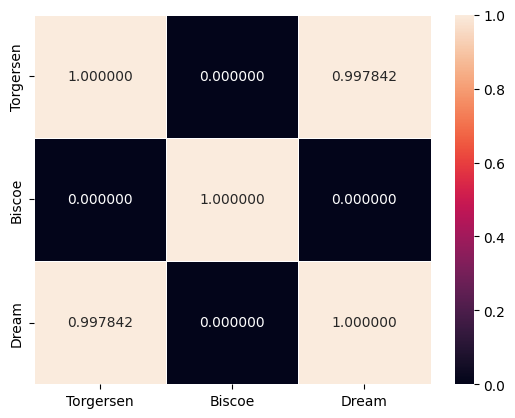

In [39]:
sns.heatmap(
    pvalue_table,
    annot=True,
    fmt=".6f",
    linewidth=0.5,
)

Torgersen과 Dream 그룹의 몸무게 평균은 유사하다. Biscoe그룹이 유의하게 차이가 있음

### 모델 생성을 위해 데이터 결측치 전체 제거 전처리 및 범주형 변수 원핫 인코딩

In [52]:
import pandas as pd

In [53]:
df = pd.read_csv('./data/penguins.csv')

In [54]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [70]:
# null 조회
nan_rows = df[df.isna().any(axis=1)]

In [76]:
delete_all_null_df = df.dropna()

In [77]:
# 이상치 조회 및 제거
rows_with_dot = delete_all_null_df[delete_all_null_df['sex'] == '.']

In [79]:
cleaned_df = delete_all_null_df.drop(delete_all_null_df[delete_all_null_df['sex'] == '.'].index, inplace=False)

In [81]:
cleaned_df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [82]:
# 결측치 제거 후 인덱스 재정렬
cleaned_df.reset_index(drop=True, inplace=True)

In [83]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# OneHotEncoder 객체 생성
encoder = OneHotEncoder(sparse_output=False)  # sparse 대신 sparse_output 사용

# 원핫 인코딩 적용
one_hot_encoded = encoder.fit_transform(cleaned_df[['sex']])

# 결과를 DataFrame으로 변환
encoded_sex_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['sex']))

In [85]:
# OneHotEncoder 객체 생성
encoder = OneHotEncoder(sparse_output=False)  # sparse 대신 sparse_output 사용

# 원핫 인코딩 적용
one_hot_encoded = encoder.fit_transform(cleaned_df[['species']])

# 결과를 DataFrame으로 변환
encoded_species_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['species']))

In [87]:
df_combined = cleaned_df.join(encoded_sex_df)

In [88]:
df_combined2 = df_combined.join(encoded_species_df)

In [91]:
final_df = df_combined2.drop(['species','sex','island'],axis = 1)

In [93]:
final_df.to_csv('./data/processed_penguin.csv', index=False) 

### 다중선형회귀모델 1차 생성
EDA를 통해, 범주형 변수가 추가되어야 할 것으로 예상되지만, 다중공선성을 고려하여 연속형 범주만 넣어서 모델 생성 시도

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
def load_penguin_dataset():
    df = pd.read_csv("./data/processed_penguin.csv")
    df = df.dropna(subset="body_mass_g")
    X = df.drop(["body_mass_g"], axis=1)
    y = df["body_mass_g"]
    return train_test_split(X, y, train_size=0.8, random_state=1234)

In [3]:
x_train, x_test, y_train, y_test = load_penguin_dataset()

In [109]:
x_train.drop(['body_mass_g'],axis=1)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex_FEMALE,sex_MALE,species_Adelie,species_Chinstrap,species_Gentoo
6,39.2,19.6,195.0,0.0,1.0,1.0,0.0,0.0
257,50.5,15.9,222.0,0.0,1.0,0.0,0.0,1.0
132,37.0,16.5,185.0,1.0,0.0,1.0,0.0,0.0
23,37.9,18.6,172.0,1.0,0.0,1.0,0.0,0.0
146,46.5,17.9,192.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
204,50.2,18.8,202.0,0.0,1.0,0.0,1.0,0.0
53,37.6,19.1,194.0,0.0,1.0,1.0,0.0,0.0
294,47.4,14.6,212.0,1.0,0.0,0.0,0.0,1.0
211,49.6,18.2,193.0,0.0,1.0,0.0,1.0,0.0


In [4]:
import statsmodels.api as sm

def train_multiple_linear_regression(X,y):
    x_constant = sm.add_constant(X,has_constant = 'add')
    model = sm.OLS(y,x_constant)
    results = model.fit()
    return results.summary()

In [5]:
x_train["body_mass_g"] = y_train

In [6]:
selected_x_train = x_train[['flipper_length_mm','culmen_length_mm','culmen_depth_mm']]
train_multiple_linear_regression(selected_x_train, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     281.6
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           1.19e-81
Time:                        02:14:25   Log-Likelihood:                -1966.5
No. Observations:                 266   AIC:                             3941.
Df Residuals:                     262   BIC:                             3955.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6287.6148    638.812     -9.843      0.000   -7545.473   -5029.757
flipper_length_mm    49.9396      2.792     17.889      0.000      44.443      55.437
culmen_length_mm      3.7990      5.944      0.639      0.523      -7.904      15.502
culmen_depth_mm      17.3646     15.658      1.109      0.268     -13.468      48.197
==============================================================================
Omnibus:                        3.771   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                3.512
Skew:                           0.276   Prob(JB):                        0.173
Kurtosis:                       3.112   Cond. No.                     5.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
## 다중공선성 진단
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
import pandas as pd

def check_multi_colinearity(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
    return vif.sort_values(by='VIF',ascending=False)

In [9]:
#다중공선성은 10이하일 때 적절

In [10]:
check_multi_colinearity(selected_x_train)

,Features,VIF
0,flipper_length_mm,139.940296
1,culmen_length_mm,110.360704
2,culmen_depth_mm,36.466212


### 2차 다중선형회귀모델 생성

다중선형회귀 후진선택법, 다중공선성이 적은 변수 선정

In [14]:
x_train= x_train.drop(['body_mass_g'],axis=1)

In [15]:
import statsmodels.api as sm

def train_multiple_linear_regression(X,y):
    x_constant = sm.add_constant(X,has_constant = 'add')
    model = sm.OLS(y,x_constant)
    results = model.fit()
    return results.summary()

In [16]:
selected_x_train = x_train
train_multiple_linear_regression(selected_x_train, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     308.4
Date:                Thu, 26 Sep 2024   Prob (F-statistic):          7.31e-115
Time:                        02:16:28   Log-Likelihood:                -1879.2
No. Observations:                 266   AIC:                             3772.
Df Residuals:                     259   BIC:                             3797.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -525.1308    369.396     -1.422      0.156   -1252.532     202.271
culmen_length_mm     16.7314      7.929      2.110      0.036       1.118      32.345
culmen_depth_mm      80.1619     22.205      3.610      0.000      36.436     123.888
flipper_length_mm    14.9265      3.204      4.659      0.000       8.618      21.235
sex_FEMALE         -450.2706    169.279     -2.660      0.008    -783.610    -116.931
sex_MALE            -74.8601    202.481     -0.370      0.712    -473.578     323.858
species_Adelie     -460.1803    110.952     -4.148      0.000    -678.663    -241.698
species_Chinstrap  -702.0317    136.429     -5.146      0.000    -970.683    -433.380
species_Gentoo      637.0812    172.791      3.687      0.000     296.826     977.336
==============================================================================
Omnibus:                        2.422   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.298   Jarque-Bera (JB):                2.338
Skew:                           0.229   Prob(JB):                        0.311
Kurtosis:                       2.980   Cond. No.                     3.29e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.06e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [17]:
## 다중공선성 진단
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
import pandas as pd

def check_multi_colinearity(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
    return vif.sort_values(by='VIF',ascending=False)

In [19]:
#다중공선성은 10이하일 때 적절

In [20]:
check_multi_colinearity(selected_x_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
3,sex_FEMALE,inf
4,sex_MALE,inf
5,species_Adelie,inf
6,species_Chinstrap,inf
7,species_Gentoo,inf
2,flipper_length_mm,6.732152
0,culmen_length_mm,6.277452
1,culmen_depth_mm,6.254764


In [22]:
target =['sex_MALE','species_Adelie','species_Chinstrap','culmen_length_mm','culmen_depth_mm']
current_x_train =selected_x_train.drop(target,axis=1)

In [23]:
check_multi_colinearity(current_x_train)

,Features,VIF
0,flipper_length_mm,2.704497
1,sex_FEMALE,1.875546
2,species_Gentoo,1.773912


In [24]:
train_multiple_linear_regression(current_x_train, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     562.9
Date:                Thu, 26 Sep 2024   Prob (F-statistic):          7.25e-114
Time:                        02:17:07   Log-Likelihood:                -1891.1
No. Observations:                 266   AIC:                             3790.
Df Residuals:                     262   BIC:                             3805.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               681.1338    580.867      1.173      0.242    -462.628    1824.896
flipper_length_mm    17.2315      2.971      5.800      0.000      11.382      23.081
sex_FEMALE         -543.3360     41.939    -12.956      0.000    -625.916    -460.757
species_Gentoo      940.0794     84.913     11.071      0.000     772.881    1107.278
==============================================================================
Omnibus:                        1.851   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                1.904
Skew:                           0.163   Prob(JB):                        0.386
Kurtosis:                       2.744   Cond. No.                     6.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 만든 회귀식을 활용해 테스트셋을 예측하고 RMSE 측정

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. 데이터셋 로드 함수
def load_penguin_dataset():
    df = pd.read_csv("./data/processed_penguin.csv")
    df = df.dropna(subset=["body_mass_g"])
    X = df.drop(["body_mass_g"], axis=1)
    y = df["body_mass_g"]
    return train_test_split(X, y, train_size=0.8, random_state=1234)

In [26]:
x_train, x_test, y_train, y_test = load_penguin_dataset()

In [27]:
import statsmodels.api as sm

# 2. 다중선형회귀 모델 학습 함수 (회귀모델 반환하도록 수정)
def train_multiple_linear_regression(X, y):
    x_constant = sm.add_constant(X, has_constant='add')
    model = sm.OLS(y, x_constant)
    results = model.fit()
    return results # 회귀 모델 결과 반환

In [28]:
# 3. 다중공선성 진단
def check_multi_colinearity(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif.sort_values(by='VIF', ascending=False)

In [30]:
# 4. 타겟 변수 선택 및 회귀 모델 학습
target = ['sex_MALE', 'species_Adelie', 'species_Chinstrap', 'culmen_length_mm', 'culmen_depth_mm']
current_x_train = x_train.drop(target, axis=1)

In [32]:
# 다중공선성 진단
from statsmodels.stats.outliers_influence import variance_inflation_factor
check_multi_colinearity(current_x_train)

,Features,VIF
0,flipper_length_mm,2.704497
1,sex_FEMALE,1.875546
2,species_Gentoo,1.773912


In [33]:
results = train_multiple_linear_regression(current_x_train, y_train)

In [34]:
# 5. 테스트 데이터로 예측하기
# x_test에서 동일한 target을 제외한 후 예측
current_x_test = x_test.drop(target, axis=1)

# 테스트셋 예측 (회귀 모델을 이용)
x_test_constant = sm.add_constant(current_x_test, has_constant='add')
y_test_pred = results.predict(x_test_constant)

In [35]:
test_results = train_multiple_linear_regression(current_x_test, y_test)

In [36]:
test_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     129.2
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           7.27e-27
Time:                        02:41:39   Log-Likelihood:                -474.57
No. Observations:                  67   AIC:                             957.1
Df Residuals:                      63   BIC:                             966.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -208.0595   1251.473     -0.166      0.868   -2708.928    2292.809
flipper_length_mm    21.8237      6.392      3.414      0.001       9.051      34.597
sex_FEMALE         -542.6043     84.926     -6.389      0.000    -712.315    -372.893
species_Gentoo      792.5996    170.129      4.659      0.000     452.624    1132.576
==============================================================================
Omnibus:                        2.759   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                2.458
Skew:                          -0.468   Prob(JB):                        0.293
Kurtosis:                       2.931   Cond. No.                     6.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
y_test_pred

149    3377.317946
320    5222.594678
268    5412.141075
92     3205.003040
137    3955.116975
          ...     
67     4075.737410
328    4765.416084
115    4092.968900
118    3342.854965
190    3515.169871
Length: 67, dtype: float64

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print('r2:',r2_score(y_test,y_test_pred))
print('test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2: 0.8575837672415112
test RMSE: 291.03207225574045
